In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
transactions = pd.read_csv('/home/olksndr/projects/transactions.csv')

In [4]:
transactions.columns

Index(['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS', 'VISITS', 'HHS', 'SPEND',
       'PRICE', 'BASE_PRICE', 'FEATURE', 'DISPLAY', 'TPR_ONLY'],
      dtype='object')

In [5]:
transactions = transactions.rename(index = str, columns={'PRICE': 'base_price', 'BASE_PRICE': 'price'})

In [6]:
transactions = transactions.drop('SPEND', axis = 1)

In [7]:
transactions['SPEND'] = transactions['price'] * transactions['UNITS']

In [8]:
transactions.head(2)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
0,14-Jan-09,367,1111009477,13,13,13,1.39,1.57,0,0,1,20.41
1,14-Jan-09,367,1111009497,20,18,18,1.39,1.39,0,0,0,27.80


In [9]:
transactions.WEEK_END_DATE = pd.to_datetime(transactions.WEEK_END_DATE)

In [10]:
transactions.index = transactions.WEEK_END_DATE

In [10]:
unique_stores = transactions.STORE_NUM.unique()

In [11]:
unique_products = transactions.UPC.unique()

In [13]:

store_a_prod_a = transactions[(transactions.UPC == unique_products[3]) & (transactions.STORE_NUM == unique_stores[2])]

In [14]:
store_a_prod_a

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
WEEK_END_DATE,,,,,,,,,,,,
2009-01-14,2009-01-14,389,1111035398,4,3,3,3.50,4.49,0,0,1,17.96
2009-01-21,2009-01-21,389,1111035398,2,2,2,3.33,4.49,0,0,1,8.98
2009-01-28,2009-01-28,389,1111035398,2,2,2,3.50,4.49,0,0,1,8.98
2009-02-04,2009-02-04,389,1111035398,7,4,4,3.50,4.49,0,0,1,31.43
2009-02-11,2009-02-11,389,1111035398,1,1,1,4.49,4.49,0,0,0,4.49
2009-02-25,2009-02-25,389,1111035398,1,1,1,4.49,4.49,0,0,0,4.49
2009-03-04,2009-03-04,389,1111035398,2,2,2,4.49,4.49,0,0,0,8.98
2009-03-11,2009-03-11,389,1111035398,2,2,2,3.99,4.49,0,0,1,8.98
2009-03-18,2009-03-18,389,1111035398,3,3,3,3.99,4.49,0,0,1,13.47


In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# FITTING THE PED constants:

In [26]:
data = transactions[(transactions.UPC == unique_products[3]) & (transactions.STORE_NUM == unique_stores[1])]

In [27]:
data.shape

(131, 12)

In [28]:
data.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
WEEK_END_DATE,,,,,,,,,,,,
2009-01-14,2009-01-14,387,1111035398,4,4,4,3.50,4.49,0,0,1,17.96
2009-01-21,2009-01-21,387,1111035398,8,7,7,3.50,4.49,0,0,1,35.92
2009-01-28,2009-01-28,387,1111035398,2,2,2,3.50,4.49,0,0,1,8.98
2009-02-04,2009-02-04,387,1111035398,6,6,6,3.67,4.49,0,0,1,26.94
2009-08-05,2009-08-05,387,1111035398,15,15,15,3.00,3.00,0,0,0,45.00


In [84]:
linear_model = ols("UNITS ~ price", data=data).fit()

linear_model.params

In [32]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  UNITS   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.106
Date:                Mon, 26 Nov 2018   Prob (F-statistic):             0.0804
Time:                        15:49:23   Log-Likelihood:                -373.01
No. Observations:                 131   AIC:                             750.0
Df Residuals:                     129   BIC:                             755.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9992      4.329      3.927      0.0

In [50]:
def f(x):
    return linear_model.params['Intercept']+linear_model.params['price']*x

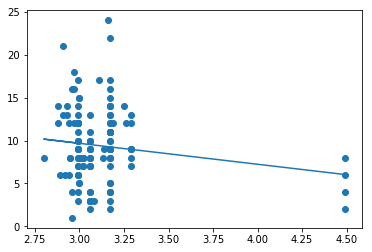

In [47]:
plt.scatter(data.price, data.UNITS)


plt.plot(data.price, f(data.price))

In [ ]:
estimated_PED = data.apply(lambda x:linear_model.params['Intercept']+linear_model.params['price']*x.price, axis=1).astype(int)

In [54]:
# Fitting the income to price dependency

# extrapolate = (data.SPEND - data.base_price*data.UNITS_)*(linear_model.params['Intercept']+linear_model.params['price']*data.price)

In [55]:
import numpy as np

In [117]:
def extrapolator(data, linear_model):
    actual_base_price = data.base_price.iloc[-1]
    
    x = np.arange(data.price.min(), data.price.max() + 5, 0.01)
    y = []
    
    for i in range(x.shape[0]):
        y.append((x[i] - actual_base_price)*(linear_model.params['Intercept']+linear_model.params['price']*x[i]))
    
    return x, y

In [91]:
current_price = data.price.iloc[-1]


In [94]:
current_price

2.99

In [97]:
x = np.arange(data.price.min(), data.price.max()+5, 0.01)
y = []

for i in range(x.shape[0]):
    y.append((x[i] - actual_base_price)*(linear_model.params['Intercept']+linear_model.params['price']*x[i]))

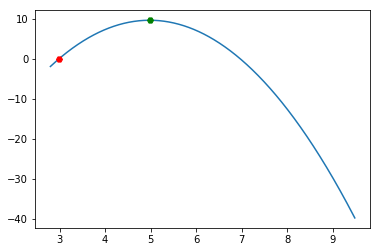

In [98]:
plt.plot(x,y)

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max(), 'g H')
plt.plot(current_price, (current_price - actual_base_price)*(linear_model.params['Intercept']+linear_model.params['price']*current_price), 'r H')

# additional testing

In [ ]:
store_category_data = transactions[(transactions.)]

In [12]:
data = transactions[(transactions.UPC == unique_products[45]) & (transactions.STORE_NUM == unique_stores[54])]

In [13]:
linear_model = ols("UNITS ~ price", data=data).fit()

linear_model.params

NameError: name 'ols' is not defined

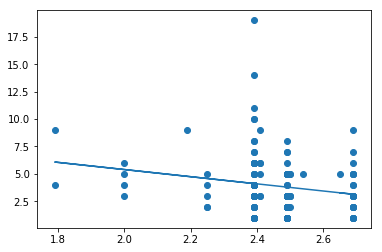

In [104]:
plt.scatter(data.price, data.UNITS)


plt.plot(data.price, f(data.price))

In [113]:


current_price = data.price.iloc[-1]

In [114]:
current_price

2.65

In [118]:
x,y = extrapolator(data, linear_model)

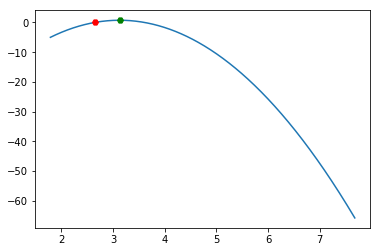

In [142]:
plt.plot(x,y)

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max(), 'g H')
plt.plot(current_price, (current_price - actual_base_price)*(linear_model.params['Intercept']-linear_model.params['price']*current_price), 'r H')

In [143]:
y

[-5.009638984771898,
 -4.924124954473514,
 -4.839252392744458,
 -4.755021299584728,
 -4.671431674994325,
 -4.5884835189732485,
 -4.5061768315215,
 -4.424511612639076,
 -4.34348786232598,
 -4.26310558058221,
 -4.183364767407768,
 -4.104265422802651,
 -4.0258075467668615,
 -3.947991139300399,
 -3.870816200403263,
 -3.794282730075453,
 -3.7183907283169706,
 -3.643140195127814,
 -3.568531130507985,
 -3.494563534457482,
 -3.421237406976306,
 -3.348552748064458,
 -3.2765095577219343,
 -3.2051078359487364,
 -3.134347582744869,
 -3.0642287981103276,
 -2.9947514820451104,
 -2.925915634549219,
 -2.8577212556226588,
 -2.7901683452654242,
 -2.723256903477514,
 -2.6569869302589293,
 -2.5913584256096756,
 -2.5263713895297477,
 -2.462025822019144,
 -2.398321723077867,
 -2.335259092705919,
 -2.272837930903298,
 -2.2110582376700014,
 -2.149920013006031,
 -2.08942325691139,
 -2.0295679693860755,
 -1.9703541504300857,
 -1.9117818000434224,
 -1.853850918226088,
 -1.7965615049780803,
 -1.7399135602993971,


# lets create a fancier regressor

In [14]:
data.head(2)

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,base_price,price,FEATURE,DISPLAY,TPR_ONLY,SPEND
5372,21-Jan-09,21479,7797502248,3,3,3,2.39,2.39,0,0,0,7.17
8507,28-Jan-09,21479,7797502248,2,2,2,2.39,2.39,0,0,0,4.78


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X=data[['price','FEATURE' ,'DISPLAY', 'TPR_ONLY']], y = data['UNITS'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.intercept_

11.566305305673739

In [19]:
lr.coef_[0]

-3.2073428466334395

In [21]:
import numpy as np

In [27]:
actual_base_price = data.base_price.iloc[-1]

x = np.arange(data.price.min(), data.price.max() + 5, 0.01, dtype=float)
y = []

for i in range(x.shape[0]):
    
    y.append((x[i] - actual_base_price)*(lr.intercept_+lr.coef_[0]*x[i]))
    
    print(x[i],actual_base_price ,y[i])

1.79 2.65 -5.009638984771898
1.8 2.65 -4.924124954473514
1.81 2.65 -4.839252392744458
1.82 2.65 -4.755021299584728
1.83 2.65 -4.671431674994325
1.84 2.65 -4.5884835189732485
1.85 2.65 -4.5061768315215
1.86 2.65 -4.424511612639076
1.87 2.65 -4.34348786232598
1.8800000000000001 2.65 -4.26310558058221
1.8900000000000001 2.65 -4.183364767407768
1.9000000000000001 2.65 -4.104265422802651
1.9100000000000001 2.65 -4.0258075467668615
1.9200000000000002 2.65 -3.947991139300399
1.9300000000000002 2.65 -3.870816200403263
1.9400000000000002 2.65 -3.794282730075453
1.9500000000000002 2.65 -3.7183907283169706
1.9600000000000002 2.65 -3.643140195127814
1.9700000000000002 2.65 -3.568531130507985
1.9800000000000002 2.65 -3.494563534457482
1.9900000000000002 2.65 -3.421237406976306
2.0 2.65 -3.348552748064458
2.0100000000000002 2.65 -3.2765095577219343
2.0200000000000005 2.65 -3.2051078359487364
2.0300000000000002 2.65 -3.134347582744869
2.04 2.65 -3.0642287981103276
2.0500000000000003 2.65 -2.994751482

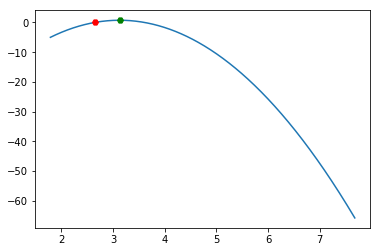

In [149]:
plt.plot(x,y)

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max(), 'g H')
plt.plot(current_price, (current_price - actual_base_price)*(lr.intercept_+lr.coef_[0]*current_price), 'r H')

In [156]:

','.join(pd.read_csv('/home/olksndr/projects/products.csv').columns)

'UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE'

In [157]:
# enlarge the observations number

In [28]:
import psycopg2

/home/olksndr/enviroments/tfdeeplearning/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [36]:
conn = psycopg2.connect("host = localhost dbname = gal user = postgres")

In [37]:
cur = conn.cursor()

In [38]:
cur.execute("""select * from transactions 
left join products on transactions.UPC = products.UPC
left join stores on transactions.STORE_NUM = stores.STORE_NUM """)

In [39]:
data = cur.fetchall()

In [41]:
columns = "WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,upc,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE,STORE_NUM,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS".split(',')

In [42]:

df = pd.DataFrame(data, columns=columns)

In [45]:
df.CATEGORY.unique()

array(['FROZEN PIZZA', 'BAG SNACKS', 'ORAL HYGIENE PRODUCTS',
       'COLD CEREAL'], dtype=object)

In [44]:
df.shape

(538643, 27)

In [16]:
unique_stores = df.STORE_NUM.unique()

In [48]:
df.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,...,PRODUCT_SIZE,STORE_NUM,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,2010-06-09,15547,7192100337,6,5,5,41.94,6.99,6.99,0,...,32.7 OZ,15547,WOODLAWN,CINCINNATI,OH,17140,MAINSTREAM,NaN,48132,27358
1,2010-06-09,15547,7192100339,12,6,6,83.88,6.99,6.99,0,...,28.3 OZ,15547,WOODLAWN,CINCINNATI,OH,17140,MAINSTREAM,NaN,48132,27358
2,2010-06-09,15547,7218063052,3,3,3,18.87,6.29,6.29,0,...,22.7 OZ,15547,WOODLAWN,CINCINNATI,OH,17140,MAINSTREAM,NaN,48132,27358
3,2010-06-09,15547,7218063979,8,5,5,50.32,6.29,6.29,0,...,27.35 OZ,15547,WOODLAWN,CINCINNATI,OH,17140,MAINSTREAM,NaN,48132,27358
4,2010-06-09,15547,7218063983,3,3,3,18.87,6.29,6.29,0,...,26.11 OZ,15547,WOODLAWN,CINCINNATI,OH,17140,MAINSTREAM,NaN,48132,27358


In [51]:
df[['ADDRESS_CITY_NAME','ADDRESS_STATE_PROV_CODE','MSA_CODE']].head()

,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE
0,CINCINNATI,OH,17140
1,CINCINNATI,OH,17140
2,CINCINNATI,OH,17140
3,CINCINNATI,OH,17140
4,CINCINNATI,OH,17140


In [53]:
# sum-up product sales, and fit a PED coefficients;

In [55]:
unique_states = df.ADDRESS_STATE_PROV_CODE.unique()

In [56]:
data = df[(df.ADDRESS_STATE_PROV_CODE == unique_states[0]) & (df.CATEGORY == 'BAG SNACKS')]

In [57]:

data.shape

(65544, 27)

In [61]:
data = data.rename(index = str, columns={'PRICE': 'base_price', 'BASE_PRICE': 'price'})

In [62]:
data['SPEND'] = data['price'] * data['UNITS']

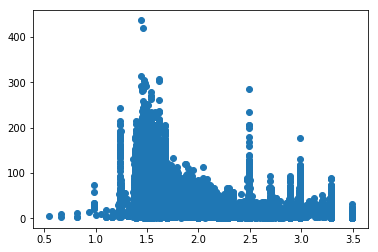

In [63]:
plt.scatter(data.price, data.UNITS)

In [28]:
data = data.rename(index = str, columns={'PRICE': 'base_price', 'BASE_PRICE': 'price'})

In [29]:
data = data.drop('SPEND', axis = 1)

In [30]:
data['SPEND'] = data['price'] * data['UNITS']

In [31]:
data.WEEK_END_DATE = pd.to_datetime(data.WEEK_END_DATE)

data.index = data.WEEK_END_DATE

In [32]:
data.shape

(789, 18)

In [33]:
data.index.unique()

Index(['906', '907', '908', '924', '925', '4056', '4057', '4058', '4075',
       '7191',
       ...
       '519370', '522576', '522577', '522578', '522588', '522589', '522593',
       '522594', '522600', '522601'],
      dtype='object', length=789)

In [36]:
data.shape

(787, 18)

In [35]:
data = data.dropna()

In [39]:
lr = LinearRegression()

In [41]:
from sklearn.model_selection import TimeSeriesSplit

In [42]:
tss = TimeSeriesSplit(n_splits=5)

In [44]:
X_train = tss.split(data)

In [46]:
for train, test in tss.split(data):
    lr.fit(X=data[['price']].iloc[train], y = data['UNITS'].iloc[train])

In [67]:
data = data.dropna()

In [76]:
data.price.quantile(.975)

3.29

In [82]:
data[data.price < data.price.quantile(.025)]

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,base_price,price,FEATURE,...,PRODUCT_SIZE,STORE_NUM,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
4347,2010-06-16,23055,1111009497,8,6,6,11.44,1.43,1.43,0,...,15 OZ,23055,WALNUT HILLS/PEEBLES,CINCINNATI,OH,17140,VALUE,239.0,22920,13000
4655,2010-06-16,24991,1111009507,55,50,50,79.75,1.45,1.45,0,...,15 OZ,24991,HYDE PARK,CINCINNATI,OH,17140,UPSCALE,1859.0,77730,50619
8326,2010-06-23,25021,7027316204,4,4,4,3.28,0.82,0.82,0,...,16 OZ,25021,HAMILTON,HAMILTON,OH,17140,VALUE,1441.0,62961,34191
22423,2010-07-21,25001,7027316204,4,3,3,3.28,0.82,0.82,0,...,16 OZ,25001,PINEWOOD,DAYTON,OH,19380,VALUE,351.0,34177,18035
25889,2010-07-28,24991,1111009507,47,44,43,68.15,1.45,1.45,0,...,15 OZ,24991,HYDE PARK,CINCINNATI,OH,17140,UPSCALE,1859.0,77730,50619
28327,2010-08-04,15541,7027316204,16,11,11,23.04,1.44,1.44,0,...,16 OZ,15541,LOVELAND,LOVELAND,OH,17140,MAINSTREAM,326.0,38858,18665
33745,2010-08-18,387,1111009507,25,22,21,36.25,1.45,1.45,0,...,15 OZ,387,TOWN & COUNTRY,KETTERING,OH,19380,UPSCALE,270.0,44547,22867
35442,2010-08-18,15541,1111009497,12,12,12,17.28,1.44,1.44,0,...,15 OZ,15541,LOVELAND,LOVELAND,OH,17140,MAINSTREAM,326.0,38858,18665
36363,2010-08-18,23067,1111009497,15,11,11,21.30,1.42,1.42,0,...,15 OZ,23067,WHIPP & BIGGER,KETTERING,OH,19380,MAINSTREAM,230.0,37319,14556
38983,2010-08-25,15541,1111009507,27,22,22,38.61,1.43,1.43,0,...,15 OZ,15541,LOVELAND,LOVELAND,OH,17140,MAINSTREAM,326.0,38858,18665


In [91]:
pd.concat((data[data.price > data.price.quantile(.975)],data[data.price < data.price.quantile(.025)])).index

Index(['156720', '160308', '163846', '169383', '171071', '171072', '173050',
       '173051', '174734', '178379',
       ...
       '518180', '518460', '518489', '520078', '521610', '524341', '524343',
       '529163', '530020', '536172'],
      dtype='object', length=606)

In [92]:
DATA = data.drop(pd.concat((data[data.price > data.price.quantile(.975)],data[data.price < data.price.quantile(.025)])).index)

In [93]:
lr.fit(X=DATA[['price']], y = DATA['UNITS'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [94]:
lr.intercept_

57.85824521785413

# the coef doesnt change, given extra columns ( STRANGE)

In [95]:
lr.coef_[0]

-16.908368630971193

In [72]:
def f(x):
    return lr.intercept_+lr.coef_[0]*x

In [73]:
lr.coef_

array([-17.64377704])

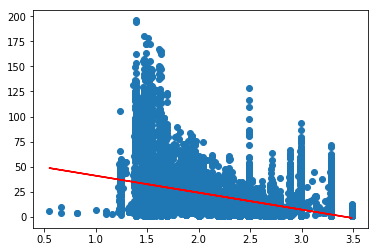

In [96]:
plt.scatter(data.price, data.UNITS)

#plt.plot( 'r -- ')
plt.plot(data.price, f(data.price), 'r')

In [67]:
current_price = data.price.iloc[train][-1]

In [68]:
test

array([656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668,
       669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681,
       682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694,
       695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707,
       708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720,
       721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733,
       734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746,
       747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759,
       760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772,
       773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785,
       786])

In [138]:
data.UNITS.iloc[test].mean()

3.030534351145038

In [59]:
import numpy as np

In [99]:
actual_base_price = data.base_price[-1]

#x = np.arange(data.price.min(), data.price.max() + 2, 0.01)
x = np.arange(actual_base_price, data.price.max()+2, 0.01)
y = []
for i in range(x.shape[0]):
    y.append((x[i] - actual_base_price)*(lr.intercept_+lr.coef_[0]*x[i]))

NameError: name 'current_price' is not defined

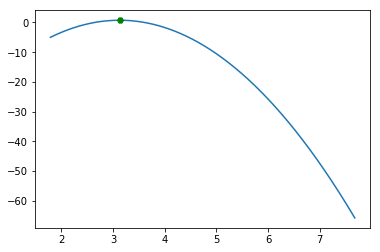

In [97]:
plt.plot(x,np.array(y) )

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max(), 'g H')

plt.plot(current_price, (current_price - actual_base_price)*(lr.intercept_+lr.coef_[0]*current_price), 'r H')

In [131]:
x[np.array(y).argmax(axis=0)]

3.949999999999986

In [137]:
data[['price','SPEND']].iloc[test]

,price,SPEND
459941,3.49,13.96
459942,3.49,6.98
459946,2.49,7.47
459947,3.29,3.29
463271,1.51,3.02
463272,1.59,7.95
463273,1.59,19.08
463284,3.29,3.29
463285,3.29,3.29
463290,3.49,6.98


In [133]:
x

array([3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39,
       3.4 , 3.41, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.61,
       3.62, 3.63, 3.64, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.71, 3.72,
       3.73, 3.74, 3.75, 3.76, 3.77, 3.78, 3.79, 3.8 , 3.81, 3.82, 3.83,
       3.84, 3.85, 3.86, 3.87, 3.88, 3.89, 3.9 , 3.91, 3.92, 3.93, 3.94,
       3.95, 3.96, 3.97, 3.98, 3.99, 4.  , 4.01, 4.02, 4.03, 4.04, 4.05,
       4.06, 4.07, 4.08, 4.09, 4.1 , 4.11, 4.12, 4.13, 4.14, 4.15, 4.16,
       4.17, 4.18, 4.19, 4.2 , 4.21, 4.22, 4.23, 4.24, 4.25, 4.26, 4.27,
       4.28, 4.29, 4.3 , 4.31, 4.32, 4.33, 4.34, 4.35, 4.36, 4.37, 4.38,
       4.39, 4.4 , 4.41, 4.42, 4.43, 4.44, 4.45, 4.46, 4.47, 4.48, 4.49,
       4.5 , 4.51, 4.52, 4.53, 4.54, 4.55, 4.56, 4.57, 4.58, 4.59, 4.6 ,
       4.61, 4.62, 4.63, 4.64, 4.65, 4.66, 4.67, 4.68, 4.69, 4.7 , 4.71,
       4.72, 4.73, 4.74, 4.75, 4.76, 4.77, 4.78, 4.

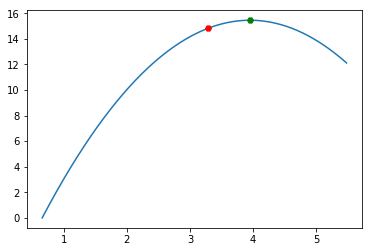

In [99]:
plt.plot(x,np.array(y) + abs(min(y)))

plt.plot(x[np.array(y).argmax(axis=0)], np.array(y).max()+abs(min(y)), 'g H')
plt.plot(current_price, (current_price - actual_base_price)*(lr.intercept_+lr.coef_[0]*current_price)+abs(min(y)), 'r H')

In [217]:
data.base_price

WEEK_END_DATE
2009-01-14    1.18
2009-01-14    1.19
2009-01-14    1.18
2009-01-14    2.49
2009-01-14    2.49
2009-01-14    2.49
2009-01-14    2.50
2009-01-21    0.96
2009-01-21    0.98
2009-01-21    0.98
2009-01-21    2.49
2009-01-21    2.49
2009-01-21    2.49
2009-01-21    2.39
2009-01-21    2.50
2009-01-28    0.97
2009-01-28    0.96
2009-01-28    1.00
2009-01-28    2.49
2009-01-28    2.49
2009-01-28    2.49
2009-01-28    2.39
2009-02-04    1.16
2009-02-04    1.15
2009-02-04    1.15
2009-02-04    2.49
2009-02-04    2.49
2009-02-04    2.49
2009-02-04    2.39
2009-02-11    1.17
              ... 
2011-12-07    2.69
2011-12-07    2.69
2011-12-14    1.21
2011-12-14    1.14
2011-12-14    1.23
2011-12-14    3.29
2011-12-14    3.29
2011-12-14    2.50
2011-12-14    3.29
2011-12-21    1.22
2011-12-21    1.17
2011-12-21    1.19
2011-12-21    3.29
2011-12-21    3.29
2011-12-21    2.50
2011-12-21    3.29
2011-12-28    1.20
2011-12-28    1.23
2011-12-28    1.19
2011-12-28    3.29
2011-12-28    3.2

# Try to increase oberved storages